The point of this notebook is to verify that snr ranges work as expected

In [29]:
#!/usr/bin/env python
from __future__ import print_function
#import numpy as np
#from time import time
#import os
import sys
#import gc
#import cProfile

import torch
#import torch.nn as nn
#import torch.optim as optim
from torch.utils.data import DataLoader, Subset
#from torchvision import transforms
#import torch.nn.functional as F
#from torch.optim.lr_scheduler import ReduceLROnPlateau

#from pytorch_lightning import LightningModule, Trainer
#from pytorch_lightning.callbacks.early_stopping import EarlyStopping
#from pytorch_lightning.callbacks import LearningRateMonitor
#from pytorch_lightning.callbacks import ModelCheckpoint
#from pytorch_lightning.loggers import TensorBoardLogger
#from torch.utils.data.distributed import DistributedSampler
#from pytorch_lightning import LightningDataModule

#from tqdm import tqdm

sys.path.append("/projects/bdoy/vsouzaramos/Wavenet_torch")
#print("importing models")
#from Wavenet_torch.models_torch_2channel import *
from models_torch_2channel import *
#print("importing data generators")
#from Wavenet_torch.data_generators_torch import *
from data_generators_torch import *

print(torch.__version__)

import argparse
#from datetime import datetime

import matplotlib.pyplot as plt

2.5.0.dev20240818+cu124


In [2]:
parser = argparse.ArgumentParser(description="SNR test")
parser.add_argument('--batch_size', type=int, help='batch size', default=32) # original default=32
parser.add_argument('--data_dir', help='root directory', default="/projects/bdoy/vsouzaramos/data/kiet_data") #spin waveform
parser.add_argument('--checkpoint_dir', help='root directory', default='/projects/bdoy/vsouzaramos/history_logger_test')
parser.add_argument('--resume_model', help='model directory', default="/projects/bdoy/vsouzaramos/history_logger_test")
parser.add_argument('--noise_dir', help='noise directory', default='/work/hdd/bdao/victoria/WaveNet_data')
parser.add_argument('--n_channels', type=int, help='number of channels', default=2)
parser.add_argument('--num_workers', type=int, help='number of workers in dataloader', default=4)
parser.add_argument('--num_nodes', type=int, help='number of nodes', default=1)
parser.add_argument('--lr_init', type=float,help='initial learning rate', default=0.001)
args, unknown = parser.parse_known_args()
print("Parsed arguments:", args)
print("Unknown arguments:", unknown)


print(f"----------------------\nArguments:\nbatch size: {args.batch_size}\ndata dir: {args.data_dir}\ncheckpoint_dir: {args.checkpoint_dir}\nresume_model: {args.resume_model}\nnoise_dir {args.noise_dir}\nn_channels {args.n_channels}\nnum_workers {args.num_workers}\nnum_nodes {args.num_nodes}\nlr_init {args.lr_init}\n----------------------")

Parsed arguments: Namespace(batch_size=32, data_dir='/projects/bdoy/vsouzaramos/data/kiet_data', checkpoint_dir='/projects/bdoy/vsouzaramos/history_logger_test', resume_model='/projects/bdoy/vsouzaramos/history_logger_test', noise_dir='/work/hdd/bdao/victoria/WaveNet_data', n_channels=2, num_workers=4, num_nodes=1, lr_init=0.001)
Unknown arguments: ['-f', '/u/vsouzaramos/.local/share/jupyter/runtime/kernel-54cfca5a-cc58-4a29-bea8-147788d907ab.json']
----------------------
Arguments:
batch size: 32
data dir: /projects/bdoy/vsouzaramos/data/kiet_data
checkpoint_dir: /projects/bdoy/vsouzaramos/history_logger_test
resume_model: /projects/bdoy/vsouzaramos/history_logger_test
noise_dir /work/hdd/bdao/victoria/WaveNet_data
n_channels 2
num_workers 4
num_nodes 1
lr_init 0.001
----------------------


In [26]:
noise_range_map = {1:[0, 0.3], 2:[0.0, 0.6], 3:[0.0, 0.9], 4:[0.3, 1.2], 5:[0.3, 1.5], 
                   6:[0.6, 1.8], 7:[0.6, 2.0], 8:[0.9, 2.0], 9:[1.0, 2.0], 10:[0.6, 2.0]} 

------------------------------ loading data generators ------------------------------
Pulling NOT gaussian files
Pulling NOT gaussian files


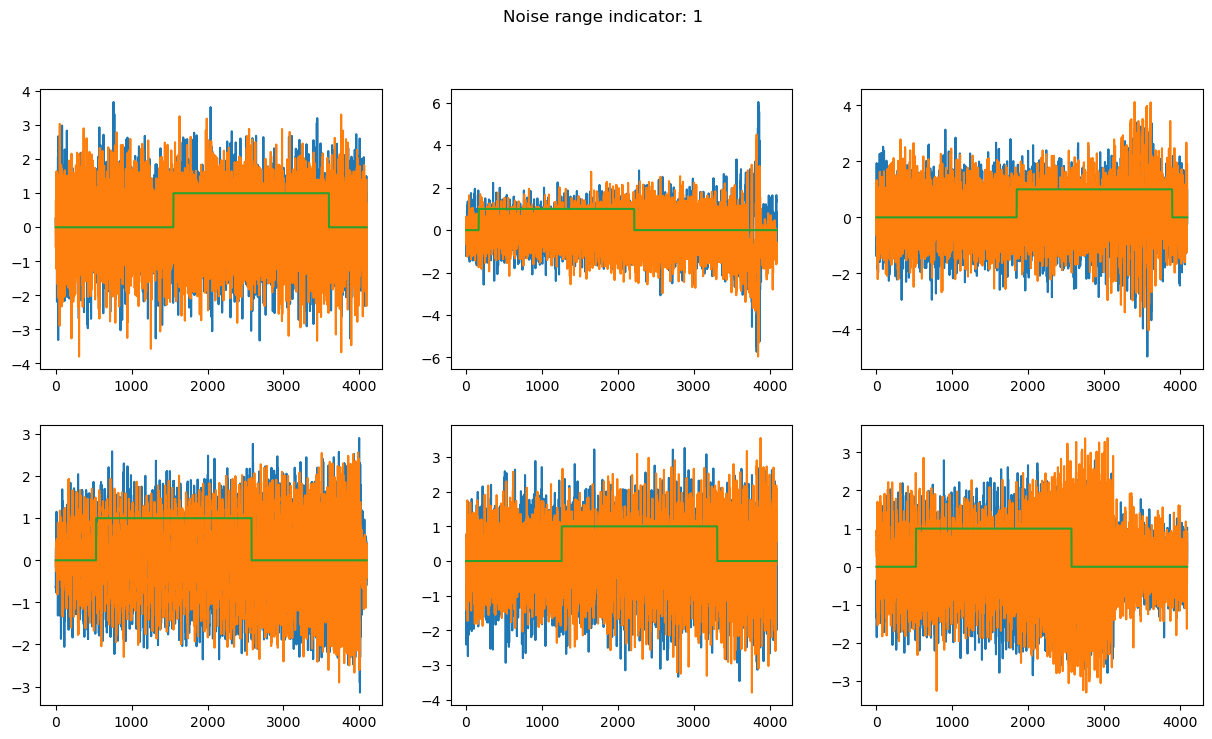

In [42]:
indicator=1

# Load Data Generators
print("------------------------------ loading data generators ------------------------------")
data_module = WaveformDataModule(args.noise_dir, 
                                    args.data_dir, 
                                    batch_size=args.batch_size,
                                    n_channels=args.n_channels,
                                    gaussian=0,
                                    noise_prob=0, 
                                    noise_range=noise_range_map[indicator], 
                                    num_workers=args.num_workers)

data_module.setup()
dataset = data_module.train_dataset


dataset_sample = Subset(dataset, range(6))  # 1000 samples for quick testing
dataset_loader = DataLoader(dataset_sample, batch_size=10, shuffle=True, num_workers=0)

fig,axs=plt.subplots(2,3, figsize=(15, 8))
fig.suptitle(f"Noise range indicator: {indicator}")
for ax_idx, ax in enumerate(axs.ravel()):
    ax.plot(dataset[ax_idx][0]) # signal
    ax.plot(dataset[ax_idx][1]) # expected output


------------------------------ loading data generators ------------------------------
Pulling NOT gaussian files
Pulling NOT gaussian files


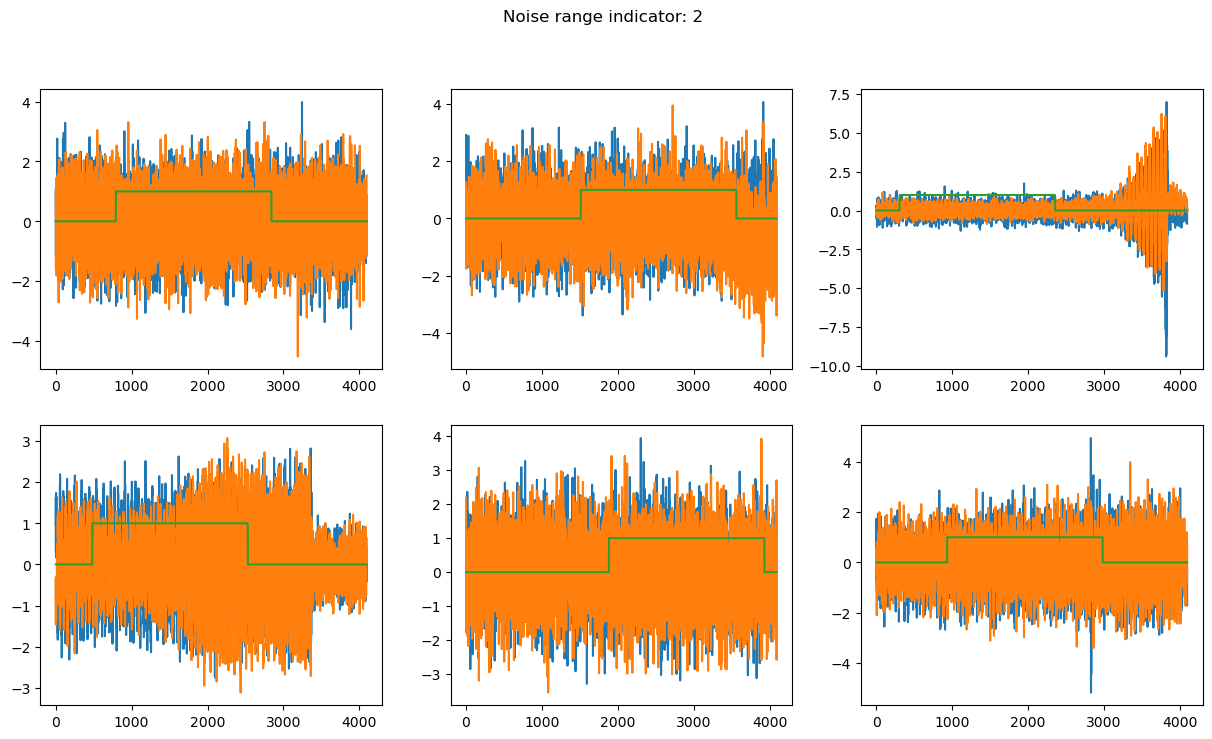

In [43]:
indicator=2

# Load Data Generators
print("------------------------------ loading data generators ------------------------------")
data_module = WaveformDataModule(args.noise_dir, 
                                    args.data_dir, 
                                    batch_size=args.batch_size,
                                    n_channels=args.n_channels,
                                    gaussian=0,
                                    noise_prob=0, 
                                    noise_range=noise_range_map[indicator], 
                                    num_workers=args.num_workers)

data_module.setup()
dataset = data_module.train_dataset


dataset_sample = Subset(dataset, range(6))  # 1000 samples for quick testing
dataset_loader = DataLoader(dataset_sample, batch_size=10, shuffle=True, num_workers=0)

fig,axs=plt.subplots(2,3, figsize=(15, 8))
fig.suptitle(f"Noise range indicator: {indicator}")
for ax_idx, ax in enumerate(axs.ravel()):
    ax.plot(dataset[ax_idx][0]) # signal
    ax.plot(dataset[ax_idx][1]) # expected output


------------------------------ loading data generators ------------------------------
Pulling NOT gaussian files
Pulling NOT gaussian files


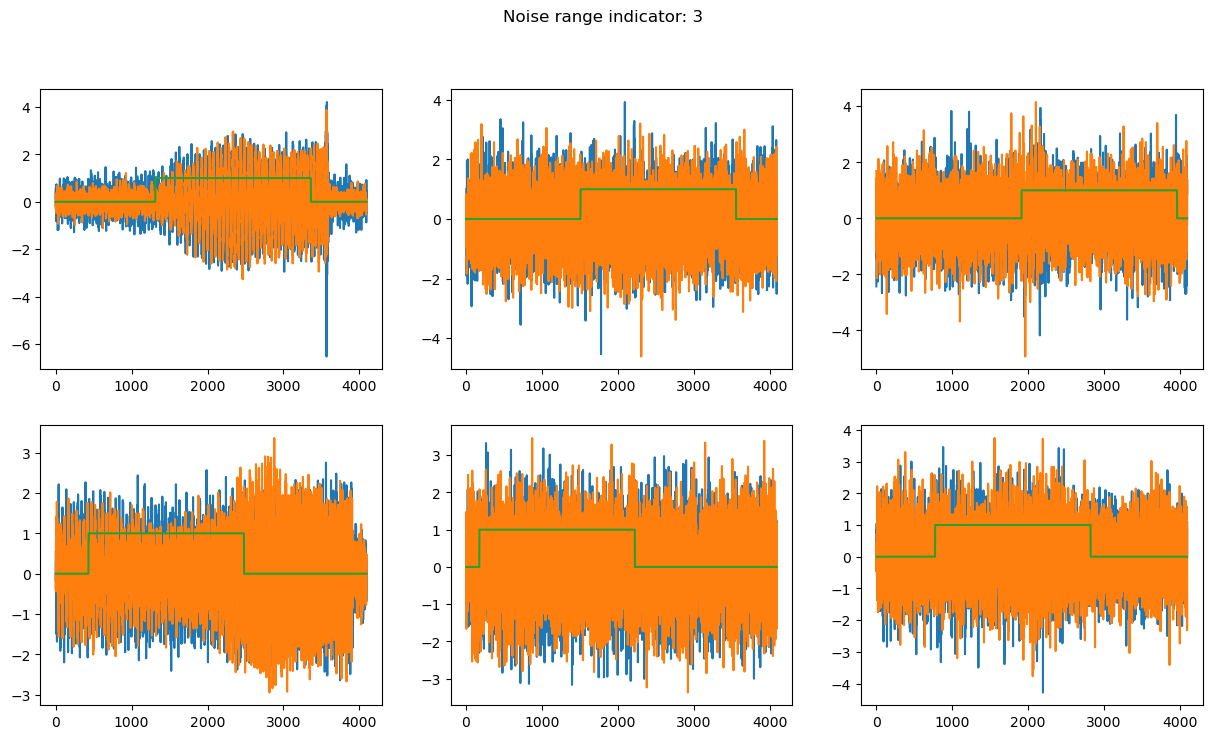

In [44]:
indicator=3

# Load Data Generators
print("------------------------------ loading data generators ------------------------------")
data_module = WaveformDataModule(args.noise_dir, 
                                    args.data_dir, 
                                    batch_size=args.batch_size,
                                    n_channels=args.n_channels,
                                    gaussian=0,
                                    noise_prob=0, 
                                    noise_range=noise_range_map[indicator], 
                                    num_workers=args.num_workers)

data_module.setup()
dataset = data_module.train_dataset


dataset_sample = Subset(dataset, range(6))  # 1000 samples for quick testing
dataset_loader = DataLoader(dataset_sample, batch_size=10, shuffle=True, num_workers=0)

fig,axs=plt.subplots(2,3, figsize=(15, 8))
fig.suptitle(f"Noise range indicator: {indicator}")
for ax_idx, ax in enumerate(axs.ravel()):
    ax.plot(dataset[ax_idx][0]) # signal
    ax.plot(dataset[ax_idx][1]) # expected output


------------------------------ loading data generators ------------------------------
Pulling NOT gaussian files
Pulling NOT gaussian files


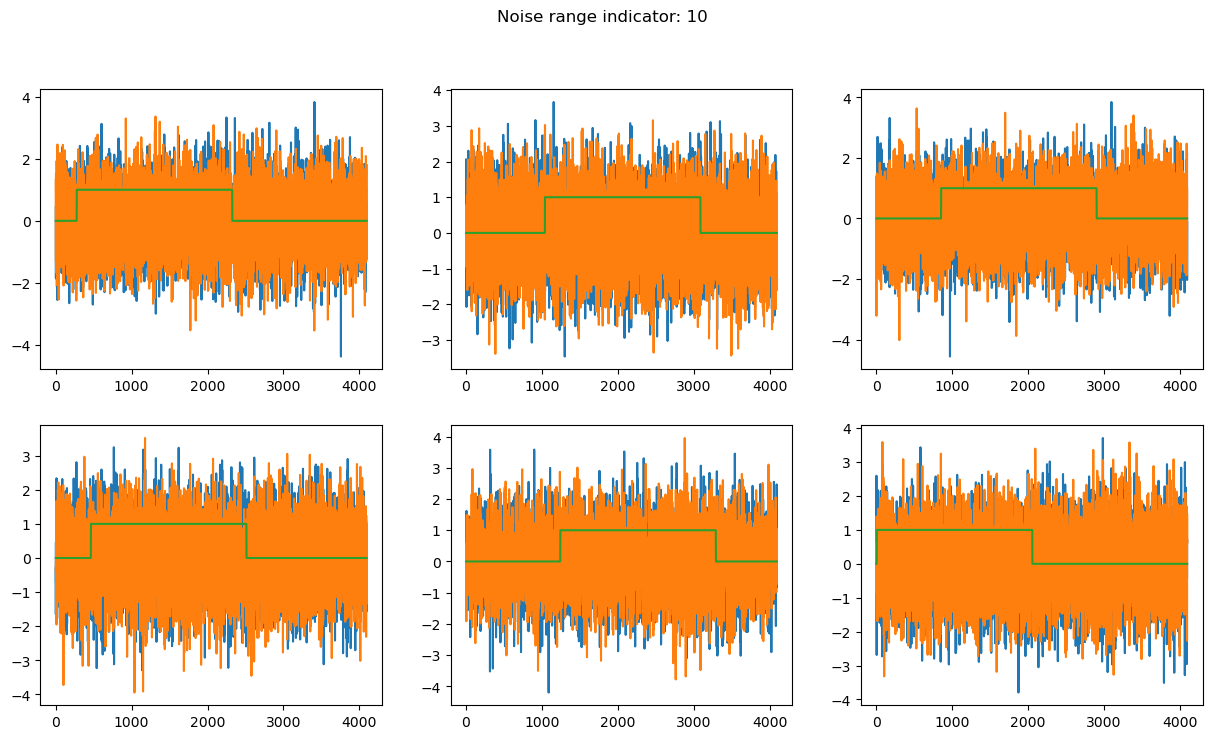

In [45]:
indicator=10

# Load Data Generators
print("------------------------------ loading data generators ------------------------------")
data_module = WaveformDataModule(args.noise_dir, 
                                    args.data_dir, 
                                    batch_size=args.batch_size,
                                    n_channels=args.n_channels,
                                    gaussian=0,
                                    noise_prob=0, 
                                    noise_range=noise_range_map[indicator], 
                                    num_workers=args.num_workers)

data_module.setup()
dataset = data_module.train_dataset


dataset_sample = Subset(dataset, range(6))  # 1000 samples for quick testing
dataset_loader = DataLoader(dataset_sample, batch_size=10, shuffle=True, num_workers=0)

fig,axs=plt.subplots(2,3, figsize=(15, 8))
fig.suptitle(f"Noise range indicator: {indicator}")
for ax_idx, ax in enumerate(axs.ravel()):
    ax.plot(dataset[ax_idx][0]) # signal
    ax.plot(dataset[ax_idx][1]) # expected output
